# Preparing Data for EDA and ML+Clustering

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import os
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn import preprocessing

In [31]:
df_original = pd.read_csv('output\dataset_worldbank_transposed.csv')
df_original.head()

,Country Name,Year,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Community health workers (per 1,000 people)",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
0,Aruba,1960,50.776,27525.0,NaN,54208.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,1961,50.761,28139.0,2.206183,55434.0,2.236462,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
2,Aruba,1962,50.746,28537.0,1.404498,56234.0,1.432843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
3,Aruba,1963,50.730,28763.0,0.788835,56699.0,0.823502,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
4,Aruba,1964,50.715,28922.0,0.551271,57029.0,0.580334,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0


In [32]:
y_cols = [c for c in df_original.columns if c.lower()[:13] == 'co2 emissions']
y_cols

['CO2 emissions from solid fuel consumption (% of total)',
 'CO2 emissions from solid fuel consumption (kt)',
 'CO2 emissions (kg per 2017 PPP $ of GDP)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions (kt)',
 'CO2 emissions (kg per 2015 US$ of GDP)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from gaseous fuel consumption (kt)']

In [33]:
df_original[y_cols].dtypes

CO2 emissions from solid fuel consumption (% of total)      float64
CO2 emissions from solid fuel consumption (kt)              float64
CO2 emissions (kg per 2017 PPP $ of GDP)                    float64
CO2 emissions (kg per PPP $ of GDP)                         float64
CO2 emissions (metric tons per capita)                      float64
CO2 emissions from liquid fuel consumption (% of total)     float64
CO2 emissions from liquid fuel consumption (kt)             float64
CO2 emissions (kt)                                          float64
CO2 emissions (kg per 2015 US$ of GDP)                      float64
CO2 emissions from gaseous fuel consumption (% of total)    float64
CO2 emissions from gaseous fuel consumption (kt)            float64
dtype: object

In [34]:
col_list = [col for col in df_original.columns.tolist() if df_original[col].dtype.name == "object"]
df_oh = df_original[col_list]
df = df_original.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df = pd.concat([df, df_oh], axis=1)
df.head()

,Year,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)",...,Country Name_Uzbekistan,Country Name_Vanuatu,"Country Name_Venezuela, RB",Country Name_Vietnam,Country Name_Virgin Islands (U.S.),Country Name_West Bank and Gaza,Country Name_World,"Country Name_Yemen, Rep.",Country Name_Zambia,Country Name_Zimbabwe
0,1960,50.776,27525.0,NaN,54208.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1961,50.761,28139.0,2.206183,55434.0,2.236462,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1962,50.746,28537.0,1.404498,56234.0,1.432843,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1963,50.730,28763.0,0.788835,56699.0,0.823502,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1964,50.715,28922.0,0.551271,57029.0,0.580334,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_original.drop(col_list, 1)

,Year,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
0,1960,50.776,27525.0,NaN,54208.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,50.761,28139.0,2.206183,55434.0,2.236462,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
2,1962,50.746,28537.0,1.404498,56234.0,1.432843,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
3,1963,50.730,28763.0,0.788835,56699.0,0.823502,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
4,1964,50.715,28922.0,0.551271,57029.0,0.580334,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16221,2016,32.296,4531238.0,1.274094,14030338.0,1.549294,NaN,NaN,NaN,59.5,...,45.570273,176288.6,NaN,NaN,NaN,NaN,NaN,10.339925,41.876696,162000.0
16222,2017,32.237,4589452.0,1.276544,14236599.0,1.459406,33.9,NaN,NaN,58.2,...,45.451183,175827.9,NaN,NaN,NaN,NaN,NaN,10.339925,41.876696,162000.0
16223,2018,32.209,4650597.0,1.323497,14438812.0,1.410382,NaN,NaN,NaN,55.9,...,45.332093,175367.2,NaN,NaN,NaN,NaN,NaN,10.339925,41.876696,162000.0
16224,2019,32.210,4717307.0,1.424249,14645473.0,1.421142,39.5,9.7,NaN,54.6,...,45.213002,174906.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
cols = [c for c in df.columns if c.lower()[:13] != 'co2 emissions']
df = df[df.columns.intersection(cols)]
df.head()

,Year,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)",...,Country Name_Uzbekistan,Country Name_Vanuatu,"Country Name_Venezuela, RB",Country Name_Vietnam,Country Name_Virgin Islands (U.S.),Country Name_West Bank and Gaza,Country Name_World,"Country Name_Yemen, Rep.",Country Name_Zambia,Country Name_Zimbabwe
0,1960,50.776,27525.0,NaN,54208.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1961,50.761,28139.0,2.206183,55434.0,2.236462,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1962,50.746,28537.0,1.404498,56234.0,1.432843,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1963,50.730,28763.0,0.788835,56699.0,0.823502,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1964,50.715,28922.0,0.551271,57029.0,0.580334,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [38]:
rf =RandomForestRegressor(n_jobs=-1, max_depth =64)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state = 1)

In [39]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [40]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), index=df.index, columns=df.columns)
df = pd.DataFrame(x_scaled)

In [17]:
# import pandas as pd
# import numpy as np

# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.fillna(0, inplace=True)
#     df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     # return df[indices_to_keep].astype(np.float64)

### Filling missing value with zero

In [18]:
# clean_dataset(df)
df.fillna(0, inplace=True)
df.head()
# X.head()

,Year,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)",...,Country Name_Uzbekistan,Country Name_Vanuatu,"Country Name_Venezuela, RB",Country Name_Vietnam,Country Name_Virgin Islands (U.S.),Country Name_West Bank and Gaza,Country Name_World,"Country Name_Yemen, Rep.",Country Name_Zambia,Country Name_Zimbabwe
0,0.000000,0.497319,0.000006,0.000000,0.000007,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016667,0.497166,0.000006,0.802059,0.000007,0.338280,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.033333,0.497013,0.000006,0.798663,0.000007,0.317672,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050000,0.496850,0.000006,0.796055,0.000007,0.302046,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.066667,0.496696,0.000006,0.795049,0.000007,0.295811,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y = df_original['CO2 emissions (metric tons per capita)'].fillna(0)
X = df
colnames = X.columns

In [20]:
feat_selector.fit(X.values, y.values.ravel())
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [21]:
len(colnames)

332

In [22]:
print('---------Top 10 for CO2 emissions (metric tons per capita)----------')
display(boruta_score.head(11))

print('---------Bottom 10 for CO2 emissions (metric tons per capita)----------')
boruta_score.tail(10)

---------Top 10 for CO2 emissions (metric tons per capita)----------


,Features,Score
0,Year,1.00
38,CO2 intensity (kg per kg of oil equivalent ene...,1.00
39,Energy use (kg of oil equivalent per capita),1.00
35,Total greenhouse gas emissions (kt of CO2 equi...,1.00
78,Country Name_Aruba,1.00
1,Urban population (% of total population),1.00
266,Country Name_Qatar,1.00
64,Agricultural land (% of land area),1.00
5,Population growth (annual %),1.00
4,"Population, total",1.00


---------Bottom 10 for CO2 emissions (metric tons per capita)----------


,Features,Score
71,Country Name_American Samoa,0.02
296,Country Name_Sub-Saharan Africa (IDA & IBRD co...,0.02
326,Country Name_Virgin Islands (U.S.),0.01
279,Country Name_Sint Maarten (Dutch part),0.01
193,Country Name_Kosovo,0.00
182,Country Name_Isle of Man,0.00
293,Country Name_St. Martin (French part),0.00
271,Country Name_San Marino,0.00
249,Country Name_Not classified,0.00
313,Country Name_Turks and Caicos Islands,0.00


Text(0.5, 1.0, 'Boruta all Features')

<Figure size 1440x2160 with 0 Axes>

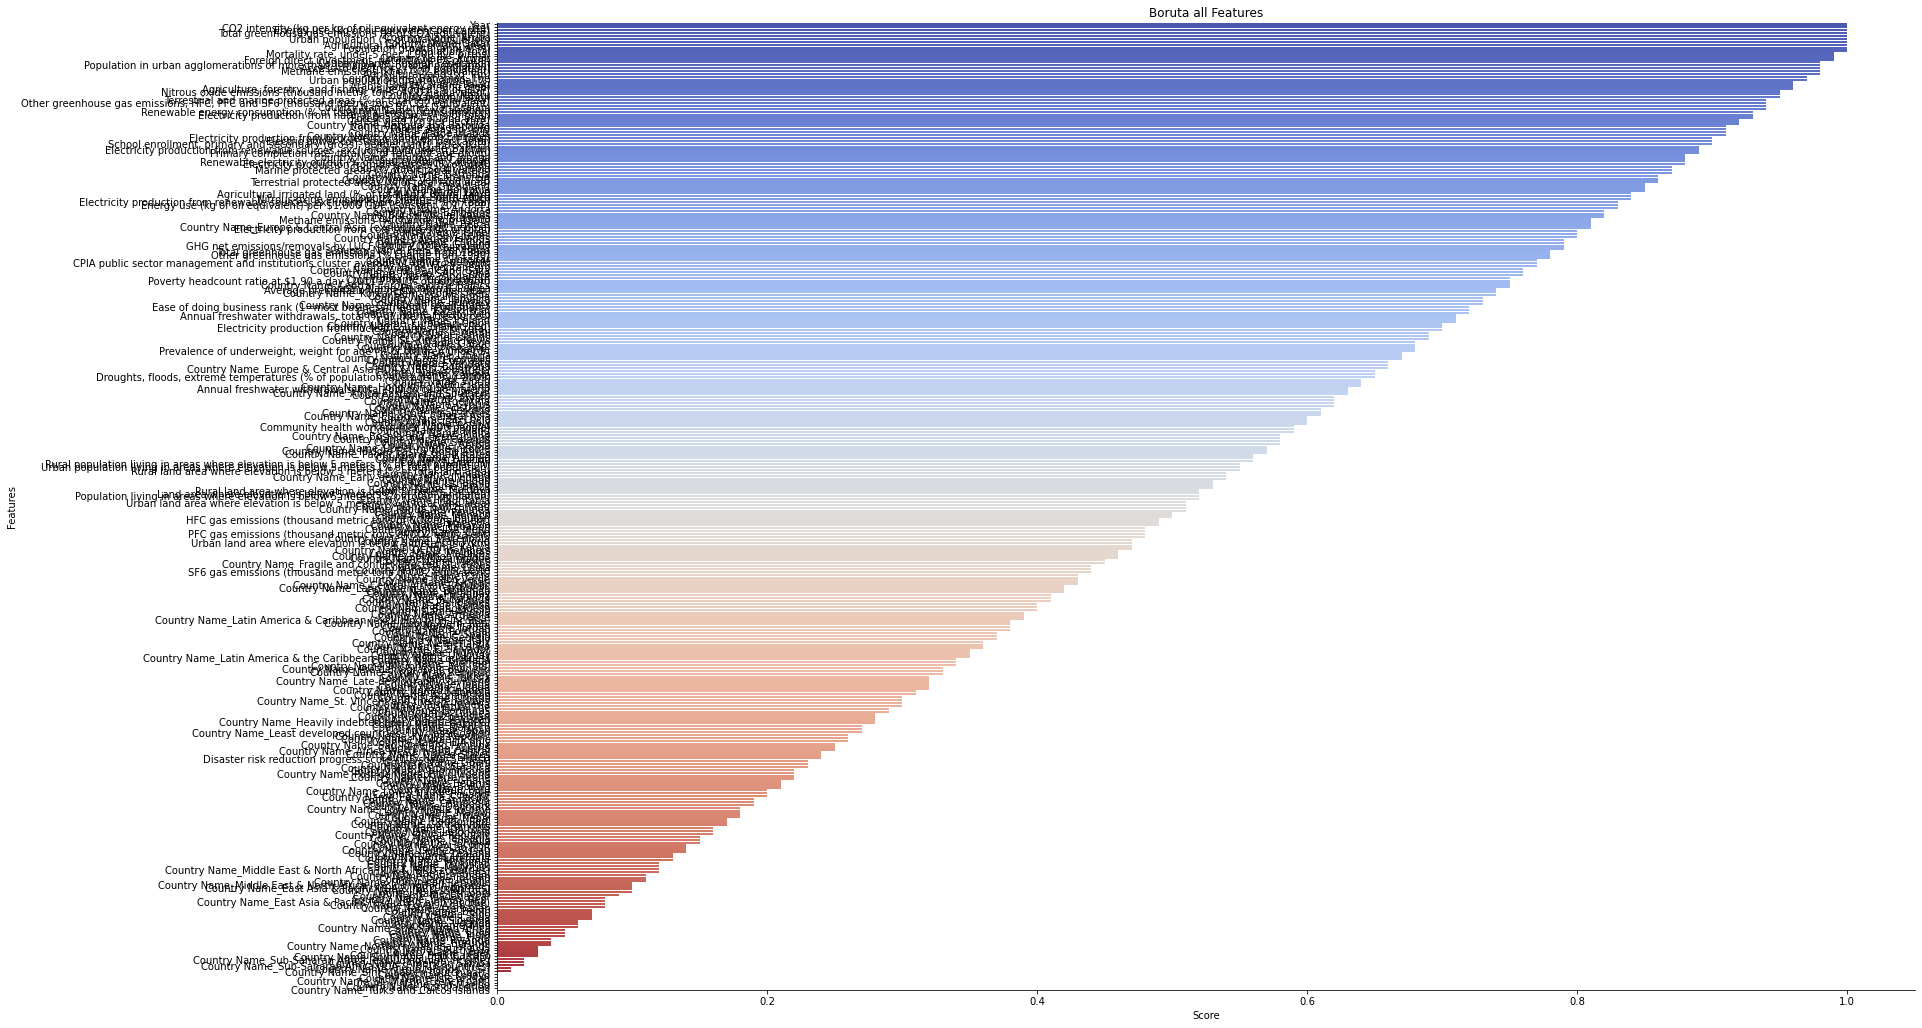

In [27]:
plt.figure(figsize=(20, 30))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta all Features")

In [24]:
boruta_score.head(11)['Features'].values

array(['Year', 'CO2 intensity (kg per kg of oil equivalent energy use)',
       'Energy use (kg of oil equivalent per capita)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Country Name_Aruba', 'Urban population (% of total population)',
       'Country Name_Qatar', 'Agricultural land (% of land area)',
       'Population growth (annual %)', 'Population, total',
       'Mortality rate, under-5 (per 1,000 live births)'], dtype=object)

In [25]:
cols_to_keep = np.delete(boruta_score.head(11)['Features'].values, [4,6])
#Remove Cols that should not be in final dataset
df_final = df_original[cols_to_keep]
df_final.head()

,Year,CO2 intensity (kg per kg of oil equivalent energy use),Energy use (kg of oil equivalent per capita),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population (% of total population),Agricultural land (% of land area),Population growth (annual %),"Population, total","Mortality rate, under-5 (per 1,000 live births)"
0,1960,NaN,NaN,NaN,50.776,NaN,NaN,54208.0,NaN
1,1961,NaN,NaN,NaN,50.761,11.111111,2.236462,55434.0,NaN
2,1962,NaN,NaN,NaN,50.746,11.111111,1.432843,56234.0,NaN
3,1963,NaN,NaN,NaN,50.730,11.111111,0.823502,56699.0,NaN
4,1964,NaN,NaN,NaN,50.715,11.111111,0.580334,57029.0,NaN


In [29]:
df_final

,Year,CO2 intensity (kg per kg of oil equivalent energy use),Energy use (kg of oil equivalent per capita),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population (% of total population),Agricultural land (% of land area),Population growth (annual %),"Population, total","Mortality rate, under-5 (per 1,000 live births)"
0,1960,NaN,NaN,NaN,50.776,NaN,NaN,54208.0,NaN
1,1961,NaN,NaN,NaN,50.761,11.111111,2.236462,55434.0,NaN
2,1962,NaN,NaN,NaN,50.746,11.111111,1.432843,56234.0,NaN
3,1963,NaN,NaN,NaN,50.730,11.111111,0.823502,56699.0,NaN
4,1964,NaN,NaN,NaN,50.715,11.111111,0.580334,57029.0,NaN
...,...,...,...,...,...,...,...,...,...
16221,2016,NaN,NaN,29120.0,32.296,41.876696,1.549294,14030338.0,59.5
16222,2017,NaN,NaN,28800.0,32.237,41.876696,1.459406,14236599.0,58.2
16223,2018,NaN,NaN,31380.0,32.209,41.876696,1.410382,14438812.0,55.9
16224,2019,NaN,NaN,NaN,32.210,NaN,1.421142,14645473.0,54.6


### Filling missing value with mean

In [41]:
df.fillna(df.mean(), inplace=True)
df.head()

,Year,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)",...,Country Name_Uzbekistan,Country Name_Vanuatu,"Country Name_Venezuela, RB",Country Name_Vietnam,Country Name_Virgin Islands (U.S.),Country Name_West Bank and Gaza,Country Name_World,"Country Name_Yemen, Rep.",Country Name_Zambia,Country Name_Zimbabwe
0,0.000000,0.497319,0.000006,0.805142,0.000007,0.326649,0.146352,0.22561,0.122375,0.173351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016667,0.497166,0.000006,0.802059,0.000007,0.338280,0.146352,0.22561,0.122375,0.173351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.033333,0.497013,0.000006,0.798663,0.000007,0.317672,0.146352,0.22561,0.122375,0.173351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050000,0.496850,0.000006,0.796055,0.000007,0.302046,0.146352,0.22561,0.122375,0.173351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.066667,0.496696,0.000006,0.795049,0.000007,0.295811,0.146352,0.22561,0.122375,0.173351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
y = df_original['CO2 emissions (metric tons per capita)'].fillna(df_original['CO2 emissions (metric tons per capita)'].mean())
X = df
colnames = X.columns

In [44]:
feat_selector.fit(X.values, y.values.ravel())
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [45]:
len(colnames)

332

In [46]:
print('---------Top 10 for CO2 emissions (metric tons per capita)----------')
display(boruta_score.head(11))

print('---------Bottom 10 for CO2 emissions (metric tons per capita)----------')
boruta_score.tail(10)

---------Top 10 for CO2 emissions (metric tons per capita)----------


,Features,Score
0,Year,1.0
266,Country Name_Qatar,1.0
1,Urban population (% of total population),1.0
53,Cereal yield (kg per hectare),1.0
39,Energy use (kg of oil equivalent per capita),1.0
78,Country Name_Aruba,1.0
37,"Other greenhouse gas emissions, HFC, PFC and S...",1.0
38,CO2 intensity (kg per kg of oil equivalent ene...,1.0
3,Urban population growth (annual %),1.0
4,"Population, total",1.0


---------Bottom 10 for CO2 emissions (metric tons per capita)----------


,Features,Score
109,Country Name_Chad,0.02
297,Country Name_Sub-Saharan Africa (excluding hig...,0.02
287,Country Name_South Asia (IDA & IBRD),0.02
286,Country Name_South Asia,0.02
247,Country Name_Northern Mariana Islands,0.01
71,Country Name_American Samoa,0.01
182,Country Name_Isle of Man,0.01
271,Country Name_San Marino,0.01
249,Country Name_Not classified,0.00
293,Country Name_St. Martin (French part),0.00


Text(0.5, 1.0, 'Boruta all Features')

<Figure size 1440x2160 with 0 Axes>

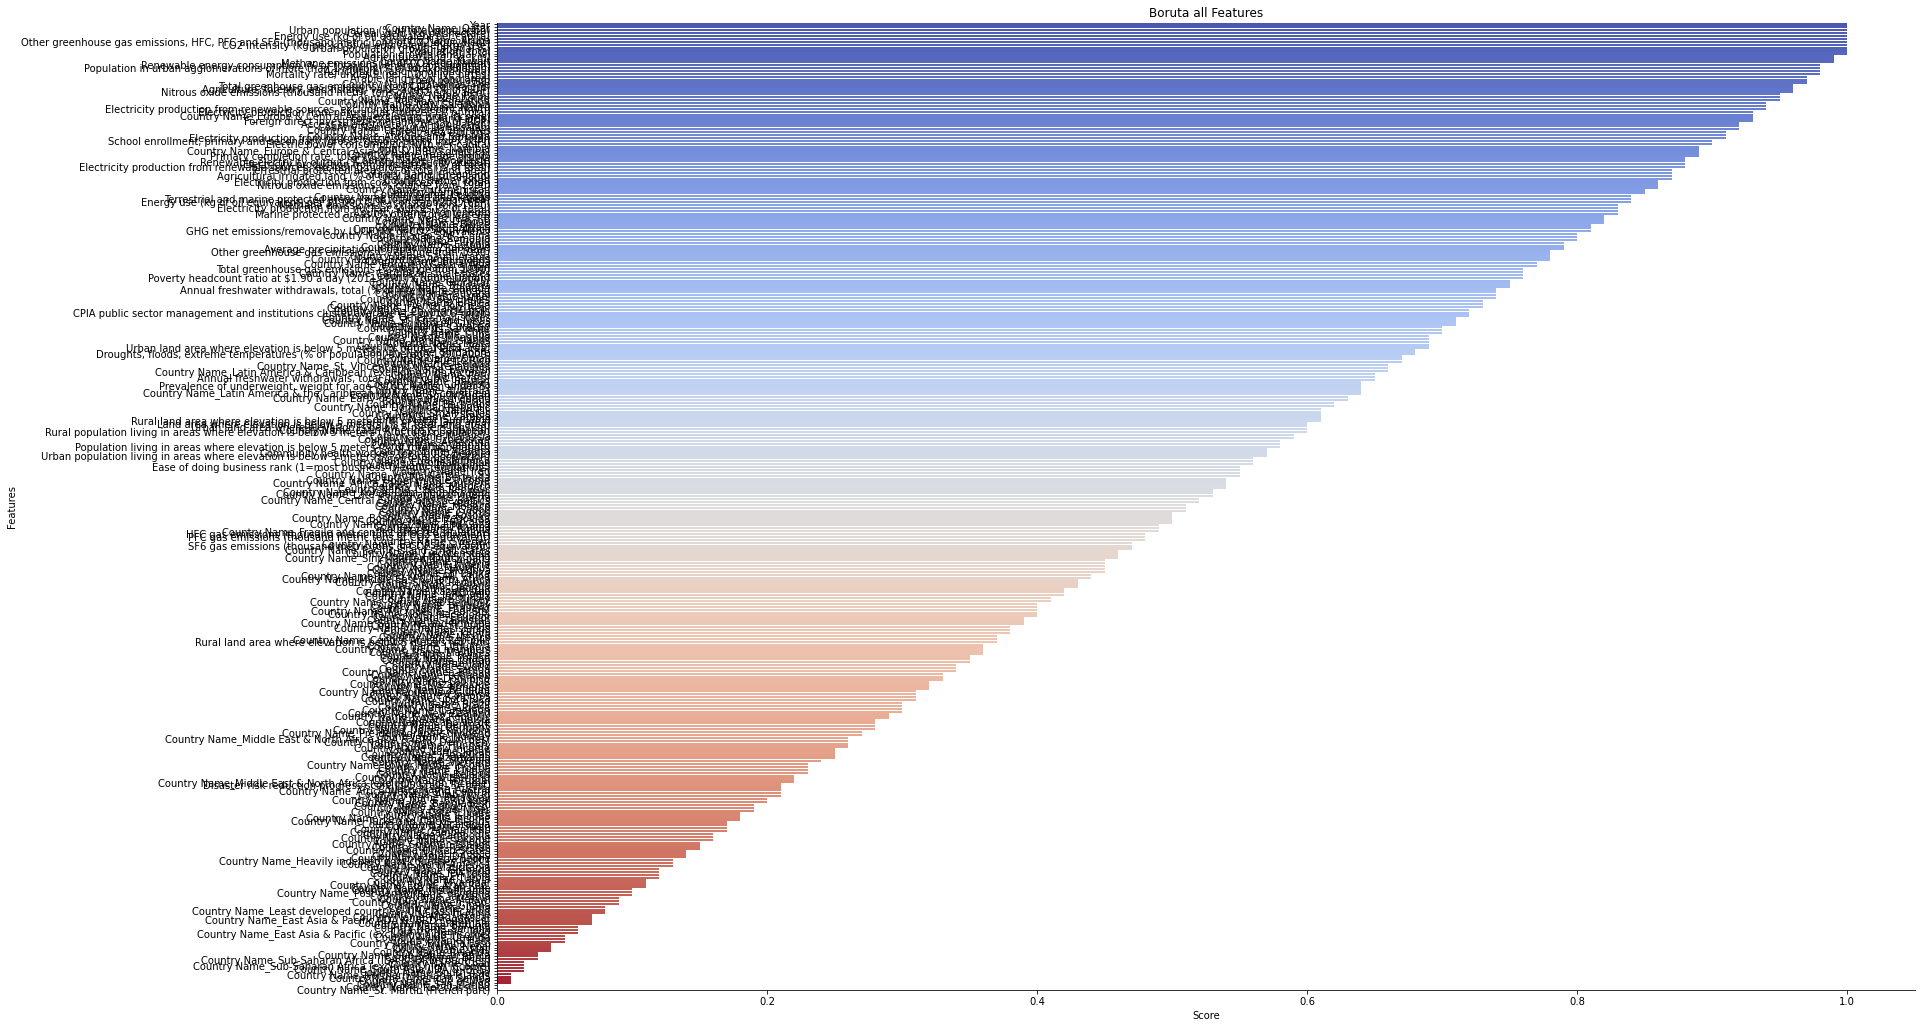

In [47]:
plt.figure(figsize=(20, 30))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta all Features")

In [ ]:
boruta_score.head(11)['Features'].values

In [28]:
boruta_score

,Features,Score
0,Year,1.0
38,CO2 intensity (kg per kg of oil equivalent ene...,1.0
39,Energy use (kg of oil equivalent per capita),1.0
35,Total greenhouse gas emissions (kt of CO2 equi...,1.0
78,Country Name_Aruba,1.0
...,...,...
182,Country Name_Isle of Man,0.0
293,Country Name_St. Martin (French part),0.0
271,Country Name_San Marino,0.0
249,Country Name_Not classified,0.0


In [48]:
boruta_score

,Features,Score
0,Year,1.00
266,Country Name_Qatar,1.00
1,Urban population (% of total population),1.00
53,Cereal yield (kg per hectare),1.00
39,Energy use (kg of oil equivalent per capita),1.00
...,...,...
71,Country Name_American Samoa,0.01
182,Country Name_Isle of Man,0.01
271,Country Name_San Marino,0.01
249,Country Name_Not classified,0.00


## Imputation

In [13]:
# def multivariate_imputation(df, iso_code, country):
    
#     N = 20
#     df_train = df.iloc[:-N] 
#     df_test = df[-N:] # last N years

#     print(f'Training years: {df_train.shape[0]}')
#     print(f'Test years: {df_test.shape[0]}')
    
#     visual_nan(df_train.shape[0], name="", isSorted=False, savePlot=True)
    
#     imp = IterativeImputer(max_iter=10, random_state=2022)
#     imp.fit(df_train.iloc[:, :49]) # exclude last column

#     df_predict_array = imp.transform(df_test.iloc[:, :49])

#     columns = df.columns.tolist()[:49]
#     df_predict = pd.DataFrame(df_predict_array, columns=columns) # array to df
    
#     df_predict['iso_code'] = iso_code
#     df_predict['country'] = country
#     df_predict['year'] = df_test['Year'].to_list() # predicted years

#     return df_predict